# Visualize the QuadTree

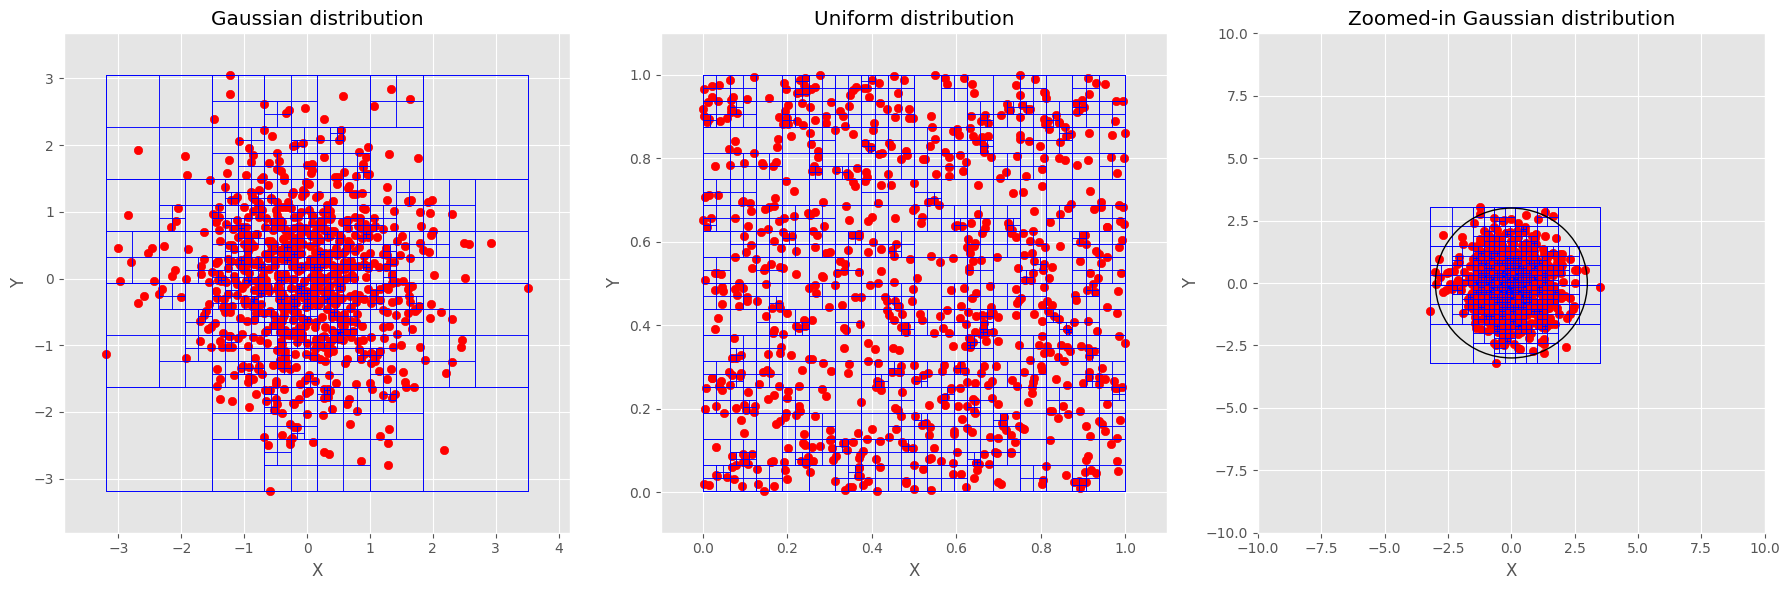

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches

plt.style.use('ggplot')


def draw_quad_tree(points_df, rectangles_df, graph_name, ax):
    points_x = points_df['pointX']
    points_y = points_df['pointY']

    rect_center_x = rectangles_df['rectCenterX']
    rect_center_y = rectangles_df['rectCenterY']
    rect_width = rectangles_df['rectWidth']
    rect_height = rectangles_df['rectHeight']

    # Plot points
    ax.scatter(points_x, points_y, color='red')

    # Plot rectangles
    for i in range(len(rectangles_df)):
        rect = patches.Rectangle(
            (rect_center_x[i] - rect_width[i] / 2,
             rect_center_y[i] - rect_height[i] / 2),
            rect_width[i],
            rect_height[i],
            linewidth=0.5,
            edgecolor='blue',
            facecolor='none',
        )
        ax.add_patch(rect)

    # Set plot limits
    ax.set_xlim(
        points_x.min() - (points_x.max() - points_x.min()) / 10,
        points_x.max() + (points_x.max() - points_x.min()) / 10
    )
    ax.set_ylim(
        points_y.min() - (points_y.max() - points_y.min()) / 10,
        points_y.max() + (points_y.max() - points_y.min()) / 10
    )

    # Set labels and title
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_title(graph_name)


# Read points data from CSV
points_df_gaussian = pd.read_csv('QuadTreeGaussianPoints.csv')
rectangles_df_gaussian = pd.read_csv('QuadTreeGaussianRects.csv')

points_df_uniform = pd.read_csv('QuadTreeUniformPoints.csv')
rectangles_df_uniform = pd.read_csv('QuadTreeUniformRects.csv')

# Create subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

# Draw QuadTree with Gaussian distribution
draw_quad_tree(points_df_gaussian, rectangles_df_gaussian,
               "Gaussian distribution", ax1)

# Draw QuadTree with Uniform distribution
draw_quad_tree(points_df_uniform, rectangles_df_uniform,
               "Uniform distribution", ax2)

# Zoomed-in version of Gaussian distribution
draw_quad_tree(points_df_gaussian, rectangles_df_gaussian,
               "Zoomed-in Gaussian distribution", ax3)
ax3.set_xlim(-10, 10)  # Set custom X-axis limits for zoom
ax3.set_ylim(-10, 10)  # Set custom Y-axis limits for zoom

# Add black circle
circle = patches.Circle((0, 0), radius=3, linewidth=1,
                        edgecolor='black', facecolor='none')
ax3.add_patch(circle)

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


# Visualize 2D KD Tree

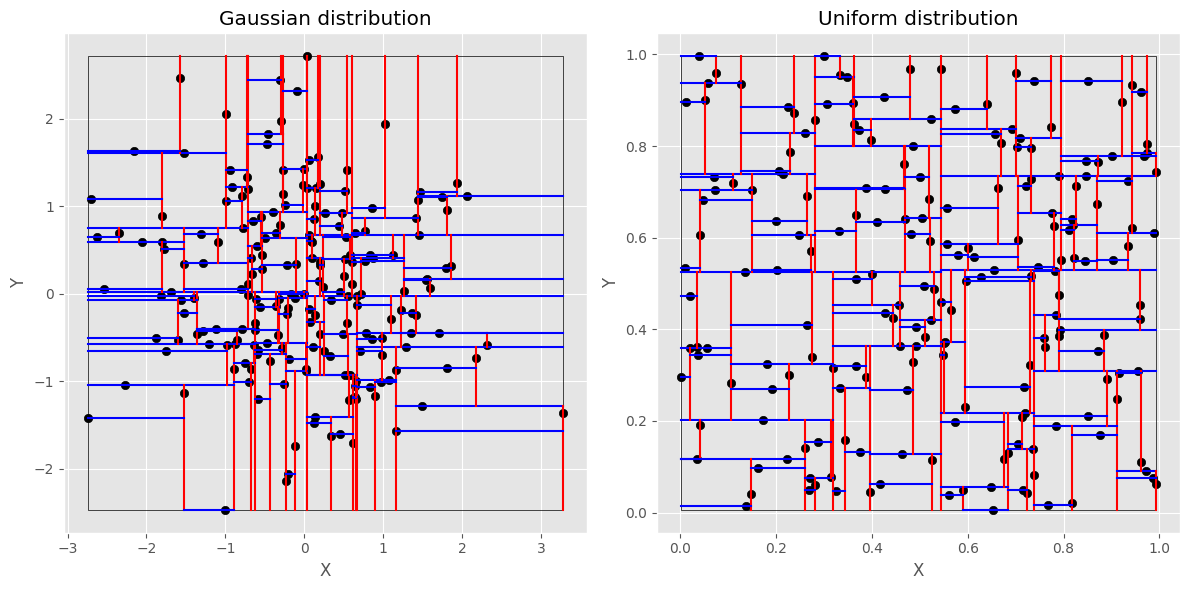

In [36]:
import matplotlib.pyplot as plt
import pandas as pd


def plot_2d_kd_tree(csv_file, graph_title, ax):
    # Load the data from the CSV file
    data = pd.read_csv(csv_file)
    points = data[['pointX', 'pointY']].values

    min_x = min(points[:, 0])
    max_x = max(points[:, 0])
    min_y = min(points[:, 1])
    max_y = max(points[:, 1])

    # Calculate the dimensions of the black rectangle
    rect_width = max_x - min_x
    rect_height = max_y - min_y

    ax.set_title(graph_title)

    # Create a scatter plot of the points in black
    ax.scatter(points[:, 0], points[:, 1], color='black')

    # Plot the split lines
    for i in range(len(data)):
        lineStartX = data['lineStartX'][i]
        lineStartY = data['lineStartY'][i]
        lineEndX = data['lineEndX'][i]
        lineEndY = data['lineEndY'][i]
        splitDim = data['splitDim'][i]

        # Set the color based on splitDim
        if splitDim == 0:
            color = 'red'
        else:
            color = 'blue'

        ax.plot([lineStartX, lineEndX], [lineStartY, lineEndY], color=color)

    # Draw a black rectangle around the points
    rect = plt.Rectangle((min_x, min_y), rect_width, rect_height,
                         edgecolor='black', facecolor='none')
    ax.add_patch(rect)

    # Set axis labels
    ax.set_xlabel('X')
    ax.set_ylabel('Y')


# Create a figure and subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Generate the plots
plot_2d_kd_tree('2DKDTreeGaussian.csv', 'Gaussian distribution', ax1)
plot_2d_kd_tree('2DKDTreeUniform.csv', 'Uniform distribution', ax2)

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()
